# [Pandas EDA 실전문제 - 성적 데이터 만져보기]
------------------------------
이전에 다뤘던 GFF데이터는 대부분의 열이 글자로 이루어진, 즉 범주형 열이 많았습니다.<br>
이번엔 수치형 열로 이루어진 데이터를 가지고 pandas로 만져보면서 간단한 통계도 해보도록 하죠

필요한 데이터:
* 성적표엑셀데이터 : `dataset/성적표.xlsx`

## 성적 데이터 분석
인코고등학교 1학년의 중간고사 성적이 나왔습니다. 1반과 2반 두개의 반으로 구성되어 있고, 학생은 각각 6명입니다. 이 성적 데이터로 간단한 데이터 분석을 하고자 합니다.

In [43]:
!pip install xlrd

In [ ]:
!pip install numpy

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [3]:
df = pd.read_excel('dataset/성적표.xlsx')
df

,반,이름,국,영,수,과
0,1,A,67,87,90,98
1,1,B,45,45,56,98
2,1,C,95,59,96,88
3,1,D,65,94,89,98
4,1,E,45,65,78,98
5,1,F,78,76,98,89
6,2,G,87,67,65,56
7,2,H,89,98,78,78
8,2,I,100,78,56,65
9,2,J,99,89,87,87


In [5]:
# 객체 타입, 차원, header, 각 열의 데이터 타입
df.shape, list(df.columns), df.dtypes

((12, 6), ['반', '이름', '국', '영', '수', '과'], 반      int64
 이름    object
 국      int64
 영      int64
 수      int64
 과      int64
 dtype: object)

엑셀쉬트를 잘 읽어들였고, 또 화면에 잘 표시합니다.

여기에 기본적인 통계인 총점과 평균을 추가해서, 평균으로 정렬해보겠습니다.

일단 그러기 전 '국어' + '영어'부터 테스트 해볼까요?

In [11]:
# 그럼 국+영 을 더해볼껀데 여러분 어떻게 하실 건가요?
df['국'] + df['영']

0     154
1      90
2     154
3     159
4     110
5     154
6     154
7     187
8     178
9     188
10    143
11    154
dtype: int64

In [10]:
# summarize data를 진행했을 때 sum()함수 있다는거 기억하신가요? 써보겠습니다.
#df[['국','영']].sum() # 이게 아닌데..
df[['국','영']].sum(axis=1) # 맞네

0     154
1      90
2     154
3     159
4     110
5     154
6     154
7     187
8     178
9     188
10    143
11    154
dtype: int64

In [12]:
# 총점과 평균 열을 df에 붙여 보자
subjects = ['국', '영', '수', '과']
df['총점'] = df[subjects].sum(axis=1)
df['평균']= df['총점'] / len(subjects)
#df.head()
df

,반,이름,국,영,수,과,총점,평균
0,1,A,67,87,90,98,342,85.50
1,1,B,45,45,56,98,244,61.00
2,1,C,95,59,96,88,338,84.50
3,1,D,65,94,89,98,346,86.50
4,1,E,45,65,78,98,286,71.50
5,1,F,78,76,98,89,341,85.25
6,2,G,87,67,65,56,275,68.75
7,2,H,89,98,78,78,343,85.75
8,2,I,100,78,56,65,299,74.75
9,2,J,99,89,87,87,362,90.50


J가 전교 1등이네요.

평균으로 막대그래프를 그려볼까요? ( plot(kind='bar') 사용)

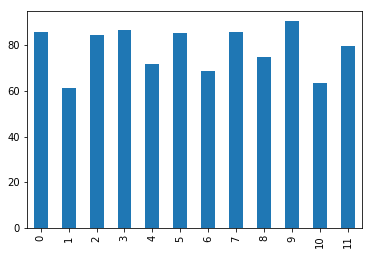

In [24]:
df['평균'].plot(kind='bar')

x축 레이블에 이름이 안나오고 index값이 출력되네요..

이름으로 바꾸는 방법은 plot함수의 옵션을 확인해도 되고 index값을 이름으로 바꿔도 되겠네요.

저희는 좀더 귀찮은 방법으로 해서 pandas를 손가락에 학습시켜봅시다.

In [26]:
# 자료를 평균으로 내림차순으로 정렬하고, index이름을 '이름' 열로 바꿔주고 막대그래프를 그려봅니다.
sorted_df = df.sort_values(['평균'], ascending=False)
sorted_df.index = sorted_df['이름'] # 행의 name을 붙임
sorted_df.head()

,반,이름,국,영,수,과,총점,평균
이름,,,,,,,,
J,2,J,99,89,87,87,362,90.50
D,1,D,65,94,89,98,346,86.50
H,2,H,89,98,78,78,343,85.75
A,1,A,67,87,90,98,342,85.50
F,1,F,78,76,98,89,341,85.25


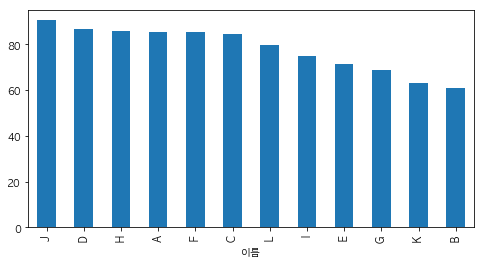

In [41]:
sorted_df['평균'].plot(kind='bar', figsize=(8, 4))

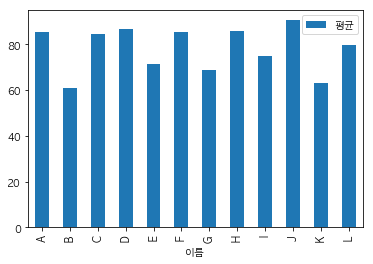

In [42]:
# plot옵션을 주는 방법도 넣었습니다.
df.plot(kind='bar', x='이름', y='평균')

막대그래프로 평균점수를 보니까 선두 그룹이 차이가 크게 나지 않네요.. 1등 유지가 쉽진 않을 듯합니다.

## 1반과 2반의 점수 비교
그럼 이번에는 1반과 2반중 어느반이 더 잘했나 볼까요?

In [28]:
df.head()

,반,이름,국,영,수,과,총점,평균
0,1,A,67,87,90,98,342,85.5
1,1,B,45,45,56,98,244,61.0
2,1,C,95,59,96,88,338,84.5
3,1,D,65,94,89,98,346,86.5
4,1,E,45,65,78,98,286,71.5


In [30]:
df_c1 = df[df['반'] == 1]
df_c2 = df[df['반'] == 2]
c1_avg = df_c1['총점'].sum() / (len(df_c1['총점']) * 4)
c2_avg = df_c2['총점'].sum() / (len(df_c2['총점']) * 4)
c1_avg, c2_avg

(79.04166666666667, 77.125)

1반이 평균이 높아서 1반 선생님 좋아합니다. 그걸 보고있던 2반 선생님이 "별 차이도 안나는구먼 뭘" 이라고 합니다.

정말 두 반의 평균은 차이가 없는 걸까요? 서로 독립적인 두 집단에서 얻어진 수치형 자료로 부터 두 집단의 차이가 유의한지를 파악하는데는 독립표본 t-검정 (two independent sample t-test)이 유용합니다. 

통계적인 과정은 통계 모듈을 불러와 씁니다.(마치 R에서 필요 라이브러리를 불러 쓰는것과 같아요)<br>
여기선 scipy의 ttest_ind 함수를 이용하여 계산합니다.

In [14]:
!pip install scipy

In [32]:
import scipy.stats as stats      ## 통계 등 과학용 모듈 scipy

stats.ttest_ind(df_c1['평균'], df_c2['평균'])

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

네, p-value가 계산되었습니다. 이제 결론을 어떻게 내죠?...

안하면 섭섭하실 까봐 통계 - 가설검정에 대한 얘기를 간단히 다루겠습니다.(시간이 허락한다면 말이죠..)

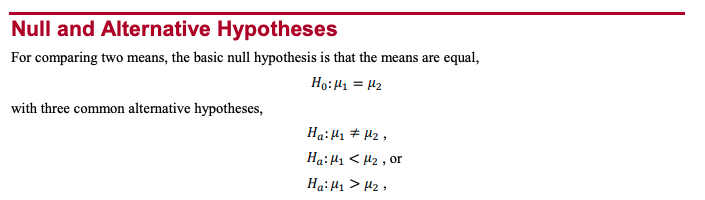
(출처) https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Two-Sample_T-Test.pdf

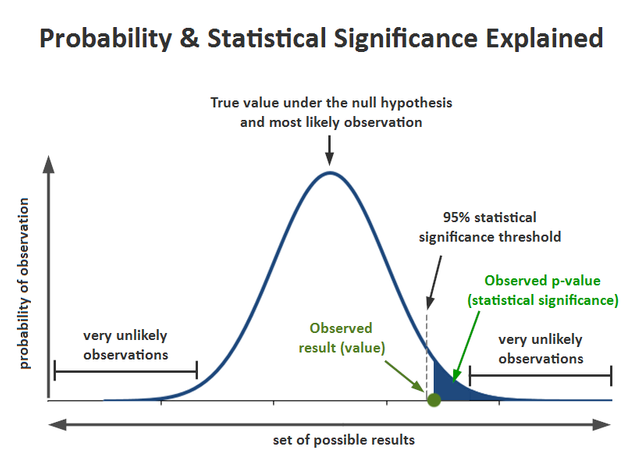

즉, 우리의 성적데이터는 유의수준(α)을 0.05로 보았을때 p-value > α 이므로 대립가설을 지지하는데 충분한 근거가 없습니다. 즉, 귀무가설을 채택합니다. 즉 1반과 2반은 사실 유의한 점수차이가 없습니다. 오차수준에 의한 차이라고 봐야겠네요. 1반 선생님 그렇게 좋아하시면 아니될 듯.

과목별로 차이가 나는지 반복문을 사용해서 보겠습니다.

In [33]:
subjects

['국', '영', '수', '과']

In [34]:
for subject in subjects:
    print(subject, stats.ttest_ind(df_c1[subject], df_c2[subject]))

국 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


과학 과목은 p value < 0.005 입니다. 차이가 많이 나네요. 평균이 어떻길래?

In [36]:
# 각 반의 과학과목의 평균을 구해 봅시다.
df_c1['과'].sum()/6, df_c2['과'].sum()/6

(94.83333333333333, 69.66666666666667)

역시 차이가 많이 났군요. 1반 학생들은 과학에 소질이 많은 것 같습니다.

### 과목별 비교
과목별로 다른 특징이 있는 것 같습니다. 먼저 전체 데이터를 막대그래프로 그려보겠습니다. 앞서 그렸던 성적별 막대그래프를 학생마다 과목별로 각각 그려보겠습니다.

In [44]:
sorted_df[subjects]

,국,영,수,과
이름,,,,
J,99,89,87,87
D,65,94,89,98
H,89,98,78,78
A,67,87,90,98
F,78,76,98,89
C,95,59,96,88
L,65,89,87,78
I,100,78,56,65
E,45,65,78,98


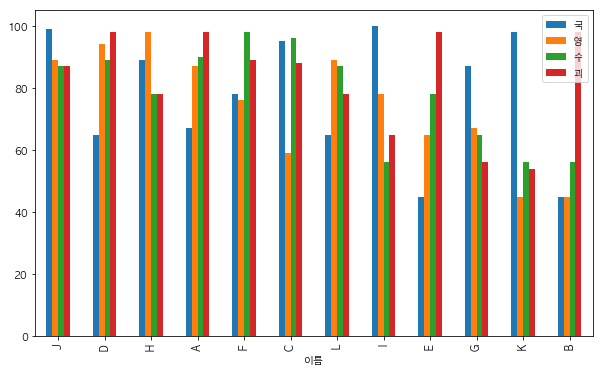

In [45]:
sorted_df[subjects].plot(kind='bar', figsize=(10, 6))

1등은 전체 과목이 안정적인데 2등부터는 약간 들쑥날쑥하네요. 과목별 점수 분포를 볼까요? boxplot으로 그려보겠습니다

과목별 점수 분포를 볼까요? boxplot으로 그려보겠습니다.

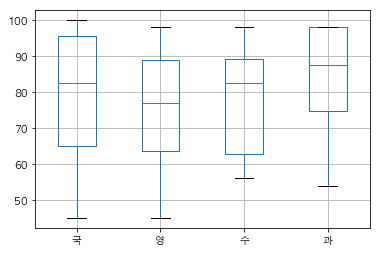

In [47]:
df[subjects].boxplot(return_type='axes')

### 과목별 상관도
보통 수학 점수가 높으면 과학 점수가 높을 것이라고 기대할 수 있습니다. 국어 점수가 높으면 영어 점수가 높을 것이라고도 기대할 수 있죠. 언어능력, 수리능력이 별개의 특징처럼 생각될 수 도 있기 때문입니다. 여기 학생들도 그런지 살펴볼까요.

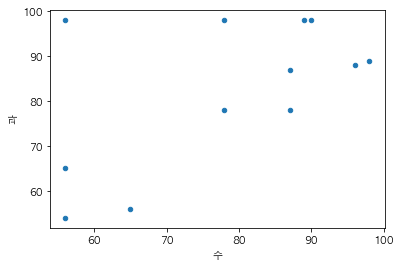

In [48]:
df.plot(kind='scatter', x='수', y='과')

얼마나 상관관계가 있을까요? 이렇때 상관계수를 구해볼 수 있습니다. 피어슨 상관계수를 구해볼까요? scipy의 stats 모듈에 함수가 있습니다.

In [49]:
stats.pearsonr(df['수'], df['과'])

(0.563289059706775, 0.05650580486155533)

앞 숫자가 상관계수 뒷 숫자가 p-value를 의미합니다. 상관계수가 0.5보다 높으므로, 관계가 있긴 하지만 p > 0.05 이므로, 유의한 상관관계가 있지는 않네요. 데이터가 좀 더 많아지면, p-value가 의미있어지는 경우가 많습니다. 이 경우는 데이터 n수가 작아서 의미를 찾기 어려운 것 같습니다. 

**Q? 국어와 영어는 어떨까요?**

In [50]:
stats.pearsonr(df['국'], df['영'])

(0.10566562777973994, 0.7437959551857832)

### 학생별 성적 패턴 분석
학생별로 어떤 학생은 수학을 잘하면서 과학을 잘하지만 영어는 약할 수 있고, 또 어떤 학생은 다른 패턴으로 잘하는 과목에 대한 특징이 있을 수 있습니다. 학생들끼리 이러한 성적 패턴이 얼마나 비슷한지 비교해 볼 수 있을까요? 이를 확인할 수 있는 다양한 방법이 있습니다. 대표적인 방법으로 `주성분분석 (Principle component analysis)`이 있습니다. 학생별로 4과목이라는 특성을 두개로 축약한 후, 2차원 평면에 표시하면, 그 종합적인 차이를 한눈에 알 수 있습니다.

PCA 분석은 scikit-learn이라는 라이브러리를 설치하고 수행할 수 있습니다.

PCA 분석의 입력자료는 4과목의 성적데이터 입니다.

In [35]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/aa/7d/6c71c35c201f6d5cec318c7ed7841317adbf291513742865ed8904ae4ea9/scikit_learn-0.21.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [51]:
df[subjects]

,국,영,수,과
0,67,87,90,98
1,45,45,56,98
2,95,59,96,88
3,65,94,89,98
4,45,65,78,98
5,78,76,98,89
6,87,67,65,56
7,89,98,78,78
8,100,78,56,65
9,99,89,87,87


이 데이터를 정규화합니다. 전체 데이터를 최대, 최소를 기준으로 재 정리합니다. 정규화하는 함수는 scikit-learn 라이브러리에서 제공됩니다.

In [52]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df[subjects])
X_std

array([[-0.55809652,  0.72621778,  0.78954203,  1.01066629],
       [-1.70024754, -1.68176748, -1.44749373,  1.01066629],
       [ 0.89555023, -0.87910573,  1.18431305,  0.36897341],
       [-0.66192843,  1.12754865,  0.72374686,  1.01066629],
       [-1.70024754, -0.53510783,  0.        ,  1.01066629],
       [ 0.01297899,  0.09555497,  1.31590339,  0.43314269],
       [ 0.48022259, -0.42044187, -0.8553372 , -1.68444381],
       [ 0.5840545 ,  1.35688058,  0.        , -0.27271947],
       [ 1.15513001,  0.21022093, -1.44749373, -1.10692022],
       [ 1.10321405,  0.84088374,  0.59215653,  0.30480412],
       [ 1.0512981 , -1.68176748, -1.44749373, -1.81278239],
       [-0.66192843,  0.84088374,  0.59215653, -0.27271947]])

위 행렬데이터가 PCA의 입력으로 사용됩니다. PCA 분석 함수는 scikit-learn 라이브러리에 있습니다.

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X_std)
Y

array([[-1.56591653, -0.09168753],
       [ 0.11774518,  2.93515218],
       [-0.20727166, -0.38845514],
       [-1.71984653, -0.24234692],
       [-1.11185524,  1.70512415],
       [-1.03327136, -0.43547978],
       [ 1.88205338, -0.20323602],
       [-0.10118555, -1.27408337],
       [ 1.88020684, -0.64411706],
       [-0.39554448, -1.36047251],
       [ 2.98704605,  0.37256038],
       [-0.7321601 , -0.37295837]])

Y 변수에 4과목(4차원)을 2차원으로 축약한 데이터 값이 저장됩니다. 보통 제1주성분, 제2주성분이라고도 합니다. 이를 원래 데이터(df)에 추가합니다.

In [ ]:
pca_df = pd.DataFrame(Y)
pca_df.index = df.index
pca_df.columns = ['PC1', 'PC2']

In [59]:
df2 = pd.merge(df, pca_df, left_index=True, right_index=True)
df2

,반,이름,국,영,수,과,총점,평균,PC1,PC2
0,1,A,67,87,90,98,342,85.50,-1.565917,-0.091688
1,1,B,45,45,56,98,244,61.00,0.117745,2.935152
2,1,C,95,59,96,88,338,84.50,-0.207272,-0.388455
3,1,D,65,94,89,98,346,86.50,-1.719847,-0.242347
4,1,E,45,65,78,98,286,71.50,-1.111855,1.705124
5,1,F,78,76,98,89,341,85.25,-1.033271,-0.435480
6,2,G,87,67,65,56,275,68.75,1.882053,-0.203236
7,2,H,89,98,78,78,343,85.75,-0.101186,-1.274083
8,2,I,100,78,56,65,299,74.75,1.880207,-0.644117
9,2,J,99,89,87,87,362,90.50,-0.395544,-1.360473


위 데이터의 PC1, PC2 값으로 scatter plot을 그려봅니다. 1반과 2반의 차이를 알아보기 위해, 각각을 그룹핑하고, 다른 색으로 표시합니다.

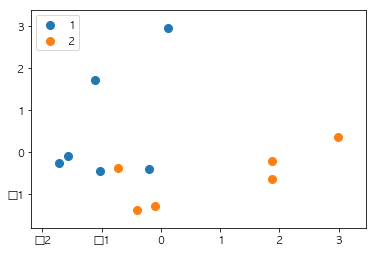

In [61]:

def draw_groups(groups, loc):
    fig, ax = plt.subplots()
    ax.margins(0.1)

    for name, group in groups:
        ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='', ms=8, label=name)

    ax.legend(numpoints=1, loc=loc)
    
draw_groups(df2.groupby('반'), loc='upper left')

1반과 2반이 특성을 가지고 cluster를 이룬다고 볼수도 있을 것 같습니다.(n수가 작아서 직접적으로 말하긴 곤란 하지만요..)

교육 방침의 차이가 난다고 할수 있을까요?

***
여기 까지 EDA 2번째 notebook을 마칩니다.

보셨듯이 python, pandas는 필요한 분석에 대한 라이브러리가 무궁무진합니다. 또한 활발히 데이터 분석가들이 쓰고있기 때문에 검색을 통해서 쉽게 원하는 분석의 코드 또한 얻을 수 있습니다.. 공부라고 생각하지 마시고, 원하는걸 얻는 재미난 도구라고 생각하고 많이 다뤄보세요.

notebook으로 자신의 자료를 만드는 건 나의 데이터분석 라이브러리를 모으는 것과도 같은 것입니다. 하나둘 페이지를 모아서 모두에 공개할수있는 좋은 자료 만드셨으면 좋겠습니다.

수고하셨습니다~